In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/lt-fs-id/data.csv")  # Replace with actual file path if needed

# Preview
print(df.head())
print(df.describe())


   Area  Sensing Range  Transmission Range  Number of Sensor nodes  \
0  5000             15                  30                     100   
1  5000             16                  32                     112   
2  5000             17                  34                     124   
3  5000             18                  36                     136   
4  5000             19                  38                     148   

   Number of Barriers  
0                  30  
1                  35  
2                  42  
3                  48  
4                  56  
               Area  Sensing Range  Transmission Range  \
count    182.000000      182.00000          182.000000   
mean   24375.000000       27.50000           55.000000   
std    15197.252769        7.52069           15.041379   
min     5000.000000       15.00000           30.000000   
25%     9375.000000       21.00000           42.000000   
50%    21875.000000       27.50000           55.000000   
75%    39375.000000       34.

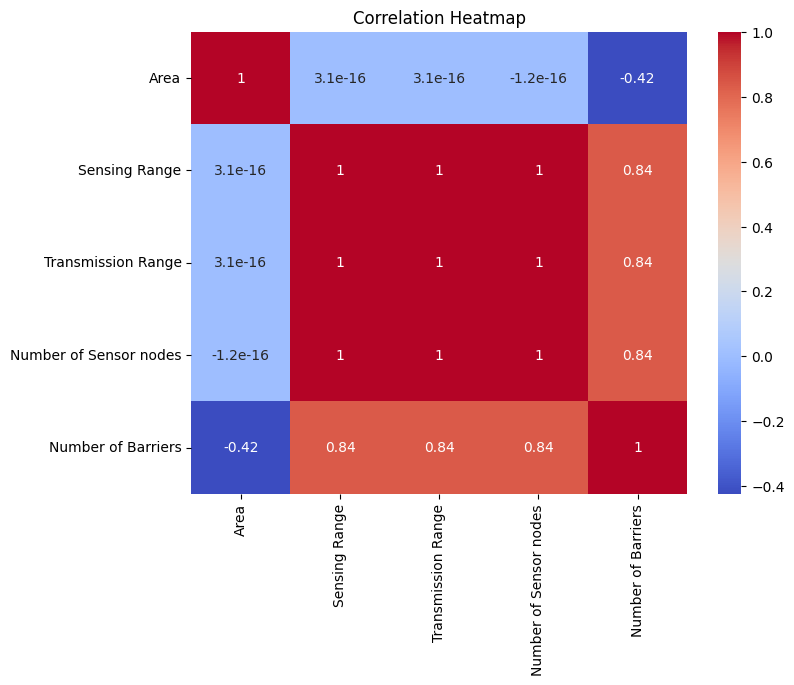

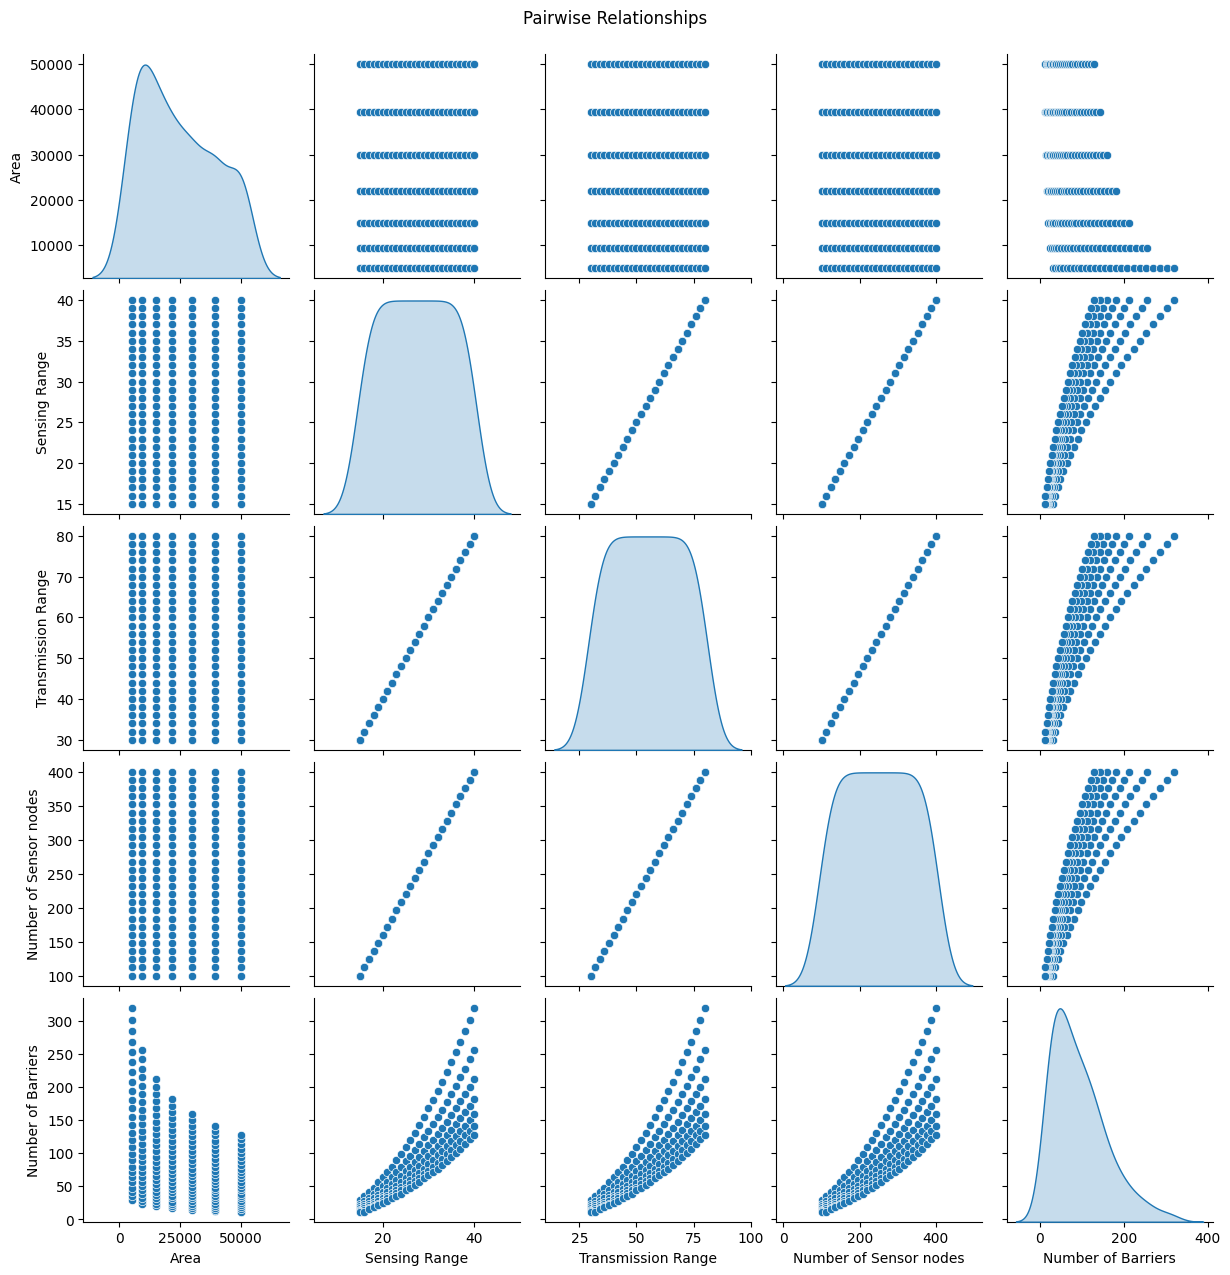

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairwise trends
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


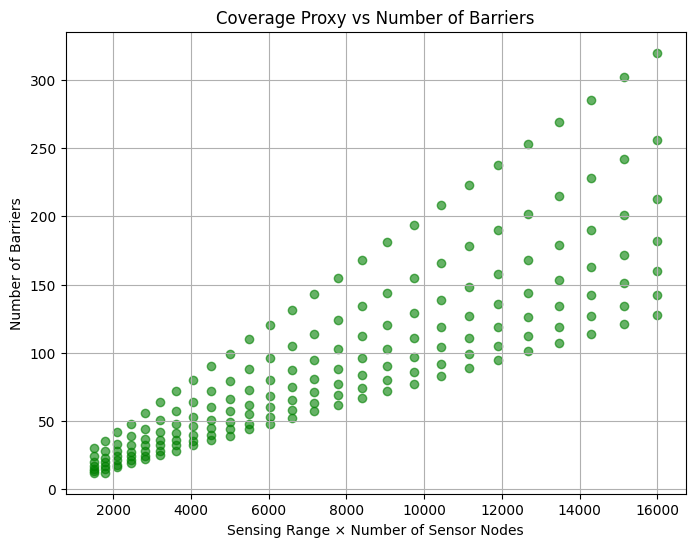

In [ ]:
import numpy as np

df["Coverage Proxy"] = df["Sensing Range"] * df["Number of Sensor nodes"]

plt.figure(figsize=(8,6))
plt.scatter(df["Coverage Proxy"], df["Number of Barriers"], c='green', alpha=0.6)
plt.xlabel("Sensing Range × Number of Sensor Nodes")
plt.ylabel("Number of Barriers")
plt.title("Coverage Proxy vs Number of Barriers")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Sensor density
df["Sensor_Density"] = df["Number of Sensor nodes"] / df["Area"]

# Sensing area per node
df["Sensing_Area_Per_Node"] = np.pi * df["Sensing Range"]**2

# Total sensing coverage (before overlap)
df["Total_Sensing_Area"] = df["Number of Sensor nodes"] * df["Sensing_Area_Per_Node"]

# Normalized coverage ratio
df["Coverage_Ratio"] = df["Total_Sensing_Area"] / df["Area"]

# Transmission ratio
df["Transmission_Ratio"] = df["Transmission Range"] / df["Sensing Range"]


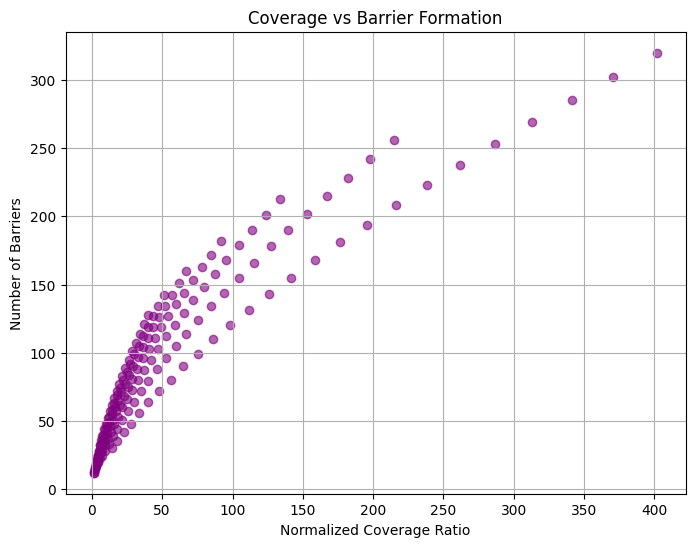

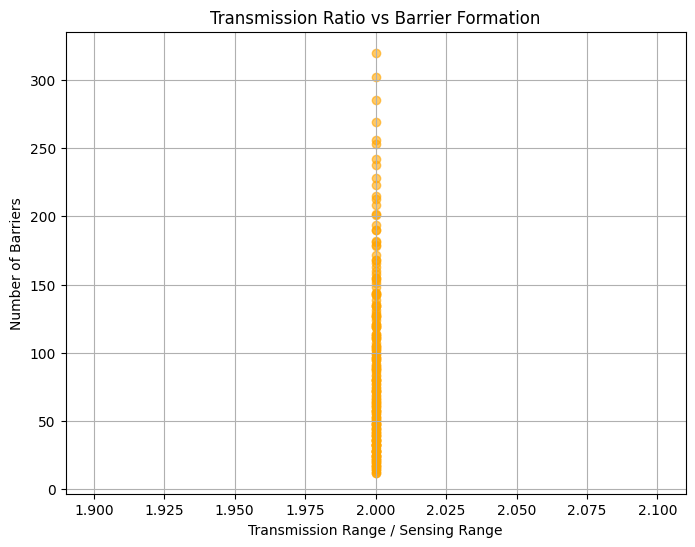

In [ ]:
# Coverage ratio vs Barriers
plt.figure(figsize=(8, 6))
plt.scatter(df["Coverage_Ratio"], df["Number of Barriers"], color='purple', alpha=0.6)
plt.xlabel("Normalized Coverage Ratio")
plt.ylabel("Number of Barriers")
plt.title("Coverage vs Barrier Formation")
plt.grid(True)
plt.show()

# Transmission Ratio vs Barriers
plt.figure(figsize=(8, 6))
plt.scatter(df["Transmission_Ratio"], df["Number of Barriers"], color='orange', alpha=0.6)
plt.xlabel("Transmission Range / Sensing Range")
plt.ylabel("Number of Barriers")
plt.title("Transmission Ratio vs Barrier Formation")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Target variable
target = "Number of Barriers"

# Option 1: Raw features
raw_features = ["Area", "Sensing Range", "Transmission Range", "Number of Sensor nodes"]

# Option 2: Physics-informed features
physics_features = ["Sensor_Density", "Coverage_Ratio", "Transmission_Ratio"]

# You can also try combining both:
combined_features = raw_features + physics_features

# Split data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[raw_features], df[target], test_size=0.2, random_state=42)
X_train_phys, X_test_phys = train_test_split(df[physics_features], test_size=0.2, random_state=42)[0:2]
X_train_comb, X_test_comb = train_test_split(df[combined_features], test_size=0.2, random_state=42)[0:2]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def train_and_evaluate(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return mae, rmse, r2

# Models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)

# Raw
mae_lr_raw, rmse_lr_raw, r2_lr_raw = train_and_evaluate(X_train_raw, X_test_raw, y_train, y_test, lr)
mae_rf_raw, rmse_rf_raw, r2_rf_raw = train_and_evaluate(X_train_raw, X_test_raw, y_train, y_test, rf)

# Physics
mae_lr_phys, rmse_lr_phys, r2_lr_phys = train_and_evaluate(X_train_phys, X_test_phys, y_train, y_test, lr)
mae_rf_phys, rmse_rf_phys, r2_rf_phys = train_and_evaluate(X_train_phys, X_test_phys, y_train, y_test, rf)

# Combined
mae_rf_comb, rmse_rf_comb, r2_rf_comb = train_and_evaluate(X_train_comb, X_test_comb, y_train, y_test, rf)


In [ ]:
print("----- RAW FEATURES -----")
print(f"Linear Regression: MAE={mae_lr_raw:.2f}, RMSE={rmse_lr_raw:.2f}, R2={r2_lr_raw:.2f}")
print(f"Random Forest:     MAE={mae_rf_raw:.2f}, RMSE={rmse_rf_raw:.2f}, R2={r2_rf_raw:.2f}")

print("\n----- PHYSICS FEATURES -----")
print(f"Linear Regression: MAE={mae_lr_phys:.2f}, RMSE={rmse_lr_phys:.2f}, R2={r2_lr_phys:.2f}")
print(f"Random Forest:     MAE={mae_rf_phys:.2f}, RMSE={rmse_rf_phys:.2f}, R2={r2_rf_phys:.2f}")

print("\n----- COMBINED FEATURES -----")
print(f"Random Forest:     MAE={mae_rf_comb:.2f}, RMSE={rmse_rf_comb:.2f}, R2={r2_rf_comb:.2f}")


----- RAW FEATURES -----
Linear Regression: MAE=19.26, RMSE=25.18, R2=0.85
Random Forest:     MAE=5.80, RMSE=8.15, R2=0.98

----- PHYSICS FEATURES -----
Linear Regression: MAE=18.67, RMSE=23.64, R2=0.87
Random Forest:     MAE=8.36, RMSE=11.20, R2=0.97

----- COMBINED FEATURES -----
Random Forest:     MAE=5.78, RMSE=7.82, R2=0.99


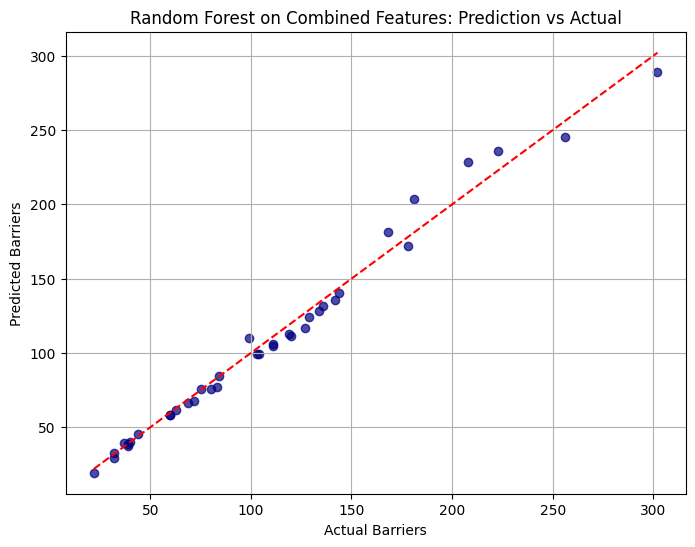

In [ ]:
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test_comb)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Barriers")
plt.ylabel("Predicted Barriers")
plt.title("Random Forest on Combined Features: Prediction vs Actual")
plt.grid(True)
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare data
features = raw_features + physics_features
X = df[features].values
y = df["Number of Barriers"].values.reshape(-1, 1)

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Convert to tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# Define PINN model
class PINN(nn.Module):
    def __init__(self, input_dim):
        super(PINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

# Model init
model = PINN(input_dim=X_train_t.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()


In [ ]:
def physics_loss(pred, X_batch):
    # Soft physics constraint: predicted barriers should not exceed total sensing area
    coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)
    penalty = torch.relu(pred - coverage_ratio * 10)  # Overshoot penalty
    return torch.mean(penalty)

# Training loop
n_epochs = 500
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()

    preds = model(X_train_t)
    data_loss = loss_fn(preds, y_train_t)
    phys_loss = physics_loss(preds, X_train_t)

    total_loss = data_loss + 0.1 * phys_loss  # weighted
    total_loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Data Loss = {data_loss.item():.4f}, Physics Loss = {phys_loss.item():.4f}")


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)
/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


Epoch 0: Data Loss = 1.0698, Physics Loss = 3.5047
Epoch 50: Data Loss = 0.0015, Physics Loss = 3.1059
Epoch 100: Data Loss = 0.0021, Physics Loss = 3.0870
Epoch 150: Data Loss = 0.0019, Physics Loss = 3.0883
Epoch 200: Data Loss = 0.0019, Physics Loss = 3.0883
Epoch 250: Data Loss = 0.0019, Physics Loss = 3.0882
Epoch 300: Data Loss = 0.0018, Physics Loss = 3.0881
Epoch 350: Data Loss = 0.0018, Physics Loss = 3.0881
Epoch 400: Data Loss = 0.0018, Physics Loss = 3.0881
Epoch 450: Data Loss = 0.0018, Physics Loss = 3.0881


R² Score: 0.9982834458351135
MAE: 2.376856565475464


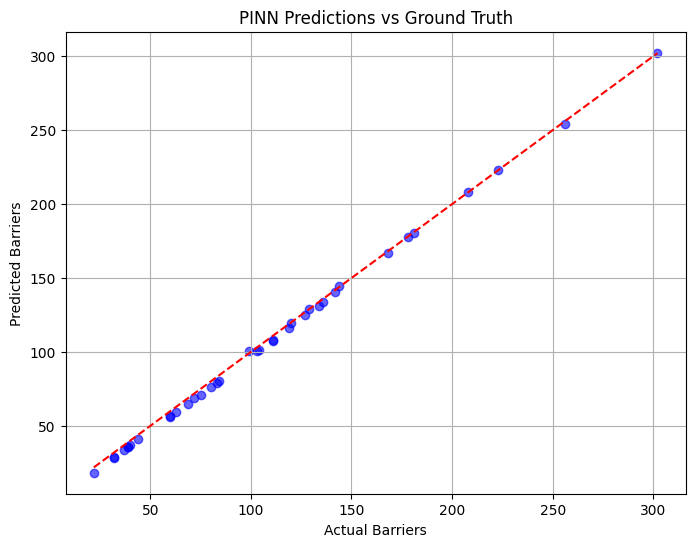

In [ ]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t).numpy()
    y_pred_test_inv = scaler_y.inverse_transform(y_pred_test)
    y_test_inv = scaler_y.inverse_transform(y_test_t.numpy())

from sklearn.metrics import r2_score, mean_absolute_error
print("R² Score:", r2_score(y_test_inv, y_pred_test_inv))
print("MAE:", mean_absolute_error(y_test_inv, y_pred_test_inv))

# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test_inv, y_pred_test_inv, color='blue', alpha=0.6)
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')
plt.xlabel("Actual Barriers")
plt.ylabel("Predicted Barriers")
plt.title("PINN Predictions vs Ground Truth")
plt.grid(True)
plt.show()


In [ ]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 20.2 MB/s eta 0:00:00


In [ ]:
import optuna

def objective(trial):
    # Hyperparameters to tune
    n_layers = trial.suggest_int("n_layers", 2, 4)
    hidden_size = trial.suggest_int("hidden_size", 32, 256)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    lambda_phys = trial.suggest_float("lambda_phys", 0.01, 1.0)
    act_fn_name = trial.suggest_categorical("activation", ["ReLU", "LeakyReLU", "Tanh"])

    # Activation function mapping
    def get_activation(name):
        if name == "ReLU": return nn.ReLU()
        if name == "LeakyReLU": return nn.LeakyReLU()
        return nn.Tanh()

    activation_fn = get_activation(act_fn_name)

    # Define model
    layers = [nn.Linear(X_train_t.shape[1], hidden_size), activation_fn]
    for _ in range(n_layers - 1):
        layers += [nn.Linear(hidden_size, hidden_size), activation_fn]
    layers += [nn.Linear(hidden_size, 1)]

    model = nn.Sequential(*layers)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()

    # Training loop
    for epoch in range(200):
        model.train()
        optimizer.zero_grad()
        preds = model(X_train_t)
        data_loss = loss_fn(preds, y_train_t)

        # Physics loss
        coverage_ratio = torch.tensor(X_train_t[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)
        penalty = torch.relu(preds - coverage_ratio * 10)
        phys_loss = torch.mean(penalty)

        total_loss = data_loss + lambda_phys * phys_loss
        total_loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_t).numpy()
        y_pred_inv = scaler_y.inverse_transform(y_pred)
        y_test_inv = scaler_y.inverse_transform(y_test_t.numpy())

    return -r2_score(y_test_inv, y_pred_inv)  # Maximize R² ⇒ minimize negative R²


In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

print("Best trial:")
print(study.best_trial)


[I 2025-06-22 07:28:35,198] A new study created in memory with name: no-name-9051f628-de35-408a-ae8a-d7572215841f
/tmp/ipython-input-15-1788514321.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_train_t[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)
[I 2025-06-22 07:28:36,005] Trial 0 finished with value: -0.997343122959137 and parameters: {'n_layers': 4, 'hidden_size': 108, 'lr': 0.0010575234518561182, 'lambda_phys': 0.11499349787213381, 'activation': 'Tanh'}. Best is trial 0 with value: -0.997343122959137.
/tmp/ipython-input-15-1788514321.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_tra

Best trial:
FrozenTrial(number=17, state=1, values=[-0.9997976422309875], datetime_start=datetime.datetime(2025, 6, 22, 7, 29, 3, 591847), datetime_complete=datetime.datetime(2025, 6, 22, 7, 29, 4, 719747), params={'n_layers': 3, 'hidden_size': 170, 'lr': 0.002338921140714141, 'lambda_phys': 0.023086165230317646, 'activation': 'Tanh'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_layers': IntDistribution(high=4, log=False, low=2, step=1), 'hidden_size': IntDistribution(high=256, log=False, low=32, step=1), 'lr': FloatDistribution(high=0.01, log=True, low=0.0001, step=None), 'lambda_phys': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'activation': CategoricalDistribution(choices=('ReLU', 'LeakyReLU', 'Tanh'))}, trial_id=17, value=None)


In [ ]:
import shap

# Use combined feature set (raw + physics-informed)
features = raw_features + physics_features # Ensure 'features' is defined here
X_comb = df[features] # Use 'features' list to select columns
X_comb_scaled = scaler_X.transform(X_comb)

# Create SHAP explainer on trained PINN model
def model_predict(X_numpy):
    X_t = torch.tensor(X_numpy, dtype=torch.float32)
    model.eval()
    with torch.no_grad():
        pred = model(X_t).numpy()
    return pred

# Explicitly provide feature names to the explainer
explainer = shap.Explainer(model_predict, X_comb_scaled, feature_names=features)
shap_values = explainer(X_comb_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
ExactExplainer explainer: 183it [00:15, 11.71it/s]                          


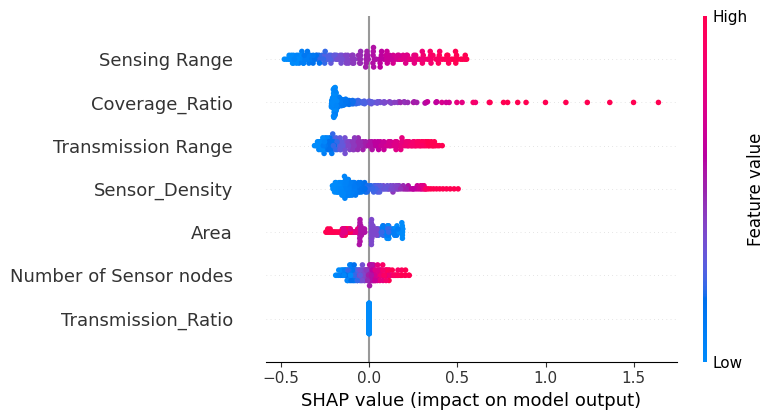

In [ ]:
shap.summary_plot(shap_values, X_comb, feature_names=raw_features + physics_features)


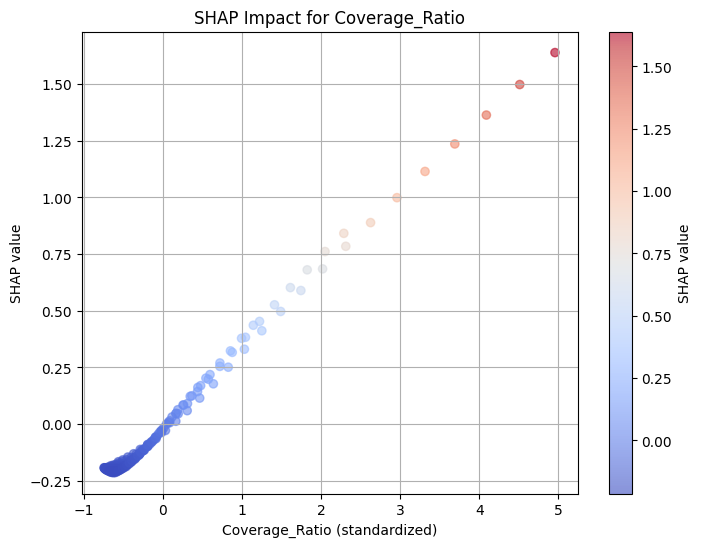

In [ ]:
import matplotlib.pyplot as plt

# Extract SHAP values and input features
shap_vals = shap_values.values  # shape (n_samples, n_features)
X_vals = X_comb_scaled  # shape (n_samples, n_features)

# Get index of feature (e.g., Coverage_Ratio)
feature_names = raw_features + physics_features
feature_index = feature_names.index("Coverage_Ratio")

# Plot manually
plt.figure(figsize=(8, 6))
plt.scatter(X_vals[:, feature_index], shap_vals[:, feature_index], alpha=0.6, c=shap_vals[:, feature_index], cmap='coolwarm')
plt.xlabel("Coverage_Ratio (standardized)")
plt.ylabel("SHAP value")
plt.title("SHAP Impact for Coverage_Ratio")
plt.grid(True)
plt.colorbar(label="SHAP value")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor  # optional, fallback to RF if needed
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Assume you've already loaded your data into a DataFrame named df
X = df[['Area', 'Sensing Range', 'Transmission Range', 'Number of Sensor nodes']]
y = df['Number of Barriers']

# Apply log transformation to X
X_log = np.log1p(X)

# Split before scaling
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.2, random_state=42)

# Apply z-score scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# SVR
svr_model = SVR(kernel='poly', degree=2, C=0.1, epsilon=0.01)
svr_model.fit(X_train_scaled, y_train)

# MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=2000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# XGBoost or fallback to RF
try:
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    xgb_model.fit(X_train_scaled, y_train)
except:
    xgb_model = RandomForestRegressor(n_estimators=100, random_state=42)
    xgb_model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
models = {
    'SVR': svr_model,
    'MLP': mlp_model,
    'XGBoost/RF': xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n📌 Model: {name}")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse:.4f}")
    print(f"Bias: {np.mean(y_pred - y_test):.4f}")



📌 Model: SVR
R² Score: -0.2974
MAE: 54.0330
RMSE: 74.0650
Bias: -35.1899

📌 Model: MLP
R² Score: 0.9992
MAE: 1.1832
RMSE: 1.7840
Bias: 0.0472

📌 Model: XGBoost/RF
R² Score: 0.9857
MAE: 5.0874
RMSE: 7.7863
Bias: -1.0434


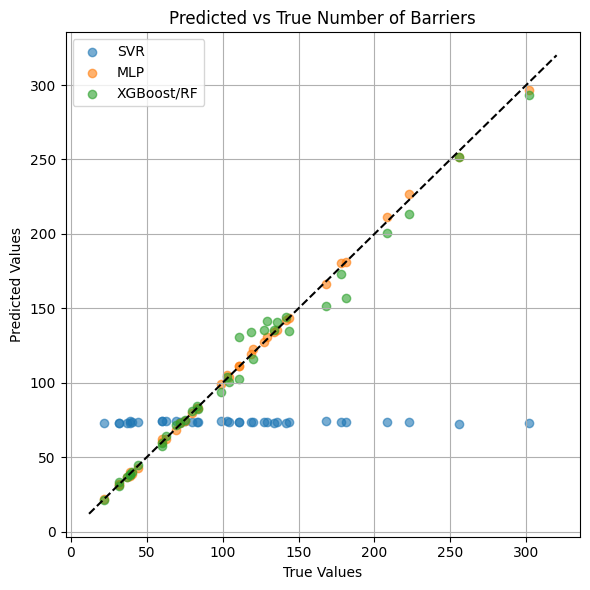

In [ ]:
plt.figure(figsize=(6, 6))
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    plt.scatter(y_test, y_pred, label=name, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs True Number of Barriers")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define a basic MLP model (no physics loss)
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, n_layers, activation_fn):
        super(MLPModel, self).__init__()
        layers = []

        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(activation_fn())

        for _ in range(n_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(activation_fn())

        layers.append(nn.Linear(hidden_size, 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Ablation function: PINN without physics loss
def train_pinn_ablation_no_phys(X_train, y_train, X_test, y_test, config):
    # Convert DataFrame/Series to torch tensors
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

    # Select activation
    activation_map = {
        'ReLU': nn.ReLU,
        'Tanh': nn.Tanh,
        'LeakyReLU': nn.LeakyReLU
    }
    activation_fn = activation_map[config['activation']]

    # Initialize model
    model = MLPModel(input_size=X_train.shape[1],
                     hidden_size=config['hidden_size'],
                     n_layers=config['n_layers'],
                     activation_fn=activation_fn)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=config['lr'])

    # Training
    for epoch in range(config['epochs']):
        model.train()
        optimizer.zero_grad()
        output = model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0 or epoch == config['epochs'] - 1:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test_tensor).numpy()
        y_true = y_test_tensor.numpy()

    print("\n📌 Ablation Study: PINN without Physics Loss")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"Bias: {np.mean(y_pred - y_true):.4f}")


In [ ]:
# Define config
config = {
    'n_layers': 3,
    'hidden_size': 128,
    'lr': 0.001,
    'activation': 'Tanh',  # Choose from: 'ReLU', 'Tanh', 'LeakyReLU'
    'epochs': 1000
}

# Run the ablation study (no physics loss)
train_pinn_ablation_no_phys(X_train, y_train, X_test, y_test, config)


Epoch 0, Loss: 12288.2734
Epoch 100, Loss: 9290.4600
Epoch 200, Loss: 7719.7476
Epoch 300, Loss: 6562.4966
Epoch 400, Loss: 5727.0215
Epoch 500, Loss: 5142.9517
Epoch 600, Loss: 4750.0591
Epoch 700, Loss: 4497.0503
Epoch 800, Loss: 4341.7837
Epoch 900, Loss: 4251.3511
Epoch 999, Loss: 4201.8965

📌 Ablation Study: PINN without Physics Loss
R² Score: -0.1532
MAE: 51.7620
RMSE: 69.8276
Bias: -25.4496


In [ ]:
X_train_raw, X_test_raw = X_train.copy(), X_test.copy()
y_train_raw, y_test_raw = y_train.copy(), y_test.copy()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define simple PINN without physics loss for ablation (raw input only)
class SimplePINN(nn.Module):
    def __init__(self, input_size, hidden_size, n_layers, activation='Tanh'):
        super(SimplePINN, self).__init__()
        act_fn = getattr(nn, activation)()

        layers = [nn.Linear(input_size, hidden_size), act_fn]
        for _ in range(n_layers - 1):
            layers.extend([nn.Linear(hidden_size, hidden_size), act_fn])
        layers.append(nn.Linear(hidden_size, 1))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Train function
def train_pinn_raw_features(X_train, y_train, X_test, y_test, config):
    model = SimplePINN(input_size=4, hidden_size=config["hidden_size"],
                       n_layers=config["n_layers"], activation=config["activation"])

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=config["lr"])

    # Use raw features (no scaling)
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)

    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

    for epoch in range(config["epochs"]):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0 or epoch == config["epochs"] - 1:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        y_pred = y_pred_tensor.numpy().flatten()
        y_true = y_test_tensor.numpy().flatten()

        print("\n📌 Ablation Study: PINN with Raw Features Only")
        print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
        print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"RMSE: {rmse:.4f}")
        print(f"Bias: {np.mean(y_pred - y_true):.4f}")

# Config
config = {
    "n_layers": 3,
    "hidden_size": 182,
    "lr": 0.00653,
    "activation": "Tanh",
    "epochs": 1000
}

# Run ablation
train_pinn_raw_features(X_train_raw, y_train_raw, X_test_raw, y_test_raw, config)


Epoch 0, Loss: 12297.1074
Epoch 100, Loss: 4183.6304
Epoch 200, Loss: 4153.2490
Epoch 300, Loss: 4153.2485
Epoch 400, Loss: 4153.2485
Epoch 500, Loss: 4153.2485
Epoch 600, Loss: 4153.2485
Epoch 700, Loss: 4153.2485
Epoch 800, Loss: 4153.2485
Epoch 900, Loss: 4153.2485
Epoch 999, Loss: 4153.2485

📌 Ablation Study: PINN with Raw Features Only
R² Score: -0.0809
MAE: 51.1640
RMSE: 67.6053
Bias: -18.5004


In [ ]:
lambda_vals = [0.001, 0.01, 0.1, 1.0]

for lambda_phys in lambda_vals:
    print(f"\n📌 Testing λ_phys = {lambda_phys}\n")

    # Re-initialize model and optimizer
    model = PINN(input_dim=X_train_t.shape[1])
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()

        preds = model(X_train_t)
        data_loss = loss_fn(preds, y_train_t)
        phys_loss = physics_loss(preds, X_train_t)

        total_loss = data_loss + lambda_phys * phys_loss
        total_loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Data Loss = {data_loss.item():.4f}, Physics Loss = {phys_loss.item():.4f}")

    # Evaluation
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_t).numpy()
        y_pred_test_inv = scaler_y.inverse_transform(y_pred_test)
        y_test_inv = scaler_y.inverse_transform(y_test_t.numpy())

    r2 = r2_score(y_test_inv, y_pred_test_inv)
    mae = mean_absolute_error(y_test_inv, y_pred_test_inv)
    rmse = ((y_pred_test_inv - y_test_inv) ** 2).mean() ** 0.5
    bias = (y_pred_test_inv - y_test_inv).mean()

    print(f"📌 λ = {lambda_phys} → R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, Bias: {bias:.4f}")



📌 Testing λ_phys = 0.001

Epoch 0: Data Loss = 1.0237, Physics Loss = 3.6247


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


Epoch 100: Data Loss = 0.0002, Physics Loss = 3.1244
Epoch 200: Data Loss = 0.0001, Physics Loss = 3.1240
Epoch 300: Data Loss = 0.0000, Physics Loss = 3.1240
Epoch 400: Data Loss = 0.0000, Physics Loss = 3.1240


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


📌 λ = 0.001 → R²: 0.9999, MAE: 0.4571, RMSE: 0.5917, Bias: -0.2171

📌 Testing λ_phys = 0.01

Epoch 0: Data Loss = 0.9606, Physics Loss = 3.5407


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


Epoch 100: Data Loss = 0.0002, Physics Loss = 3.1202


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


Epoch 200: Data Loss = 0.0001, Physics Loss = 3.1209
Epoch 300: Data Loss = 0.0000, Physics Loss = 3.1209
Epoch 400: Data Loss = 0.0000, Physics Loss = 3.1209
📌 λ = 0.01 → R²: 0.9999, MAE: 0.4660, RMSE: 0.5877, Bias: -0.2501

📌 Testing λ_phys = 0.1

Epoch 0: Data Loss = 0.9537, Physics Loss = 3.4755


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)
/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


Epoch 100: Data Loss = 0.0020, Physics Loss = 3.0892
Epoch 200: Data Loss = 0.0019, Physics Loss = 3.0885
Epoch 300: Data Loss = 0.0018, Physics Loss = 3.0882


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


Epoch 400: Data Loss = 0.0018, Physics Loss = 3.0881
📌 λ = 0.1 → R²: 0.9982, MAE: 2.4267, RMSE: 2.7877, Bias: -2.3560

📌 Testing λ_phys = 1.0

Epoch 0: Data Loss = 0.9962, Physics Loss = 3.4542


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


Epoch 100: Data Loss = 0.1788, Physics Loss = 2.7652


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


Epoch 200: Data Loss = 0.1798, Physics Loss = 2.7633
Epoch 300: Data Loss = 0.1805, Physics Loss = 2.7622
Epoch 400: Data Loss = 0.1810, Physics Loss = 2.7616
📌 λ = 1.0 → R²: 0.8421, MAE: 21.8570, RMSE: 25.8388, Bias: -21.6686


In [ ]:
lambda_vals = [0.0, 0.001, 0.01, 0.1, 1.0]

for λ in lambda_vals:
    print(f"\n📌 Testing λ_phys = {λ}")

    # Reinitialize model and optimizer
    model = PINN(input_dim=X_train_t.shape[1])
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    for epoch in range(401):
        model.train()
        optimizer.zero_grad()
        pred = model(X_train_t)
        data_loss = loss_fn(pred, y_train_t)

        if λ == 0.0:
            total_loss = data_loss
        else:
            phys_loss = physics_loss(pred, X_train_t)
            total_loss = data_loss + λ * phys_loss

        total_loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            if λ != 0:
                print(f"Epoch {epoch}: Data Loss = {data_loss.item():.4f}, Physics Loss = {phys_loss.item():.4f}")
            else:
                print(f"Epoch {epoch}: Data Loss = {data_loss.item():.4f}")

    # Eval
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_t).numpy()
        y_pred_inv = scaler_y.inverse_transform(y_pred_test)
        y_test_inv = scaler_y.inverse_transform(y_test_t.numpy())

        r2 = r2_score(y_test_inv, y_pred_inv)
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        bias = np.mean(y_pred_inv - y_test_inv)

        print(f"📌 λ = {λ} → R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, Bias: {bias:.4f}")



📌 Testing λ_phys = 0.0
Epoch 0: Data Loss = 1.0577
Epoch 100: Data Loss = 0.0003
Epoch 200: Data Loss = 0.0001
Epoch 300: Data Loss = 0.0000
Epoch 400: Data Loss = 0.0000
📌 λ = 0.0 → R²: 0.9999, MAE: 0.4205, RMSE: 7.7863, Bias: -0.1835

📌 Testing λ_phys = 0.001
Epoch 0: Data Loss = 0.9790, Physics Loss = 3.5674


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


Epoch 100: Data Loss = 0.0002, Physics Loss = 3.1245
Epoch 200: Data Loss = 0.0001, Physics Loss = 3.1242
Epoch 300: Data Loss = 0.0001, Physics Loss = 3.1241
Epoch 400: Data Loss = 0.0000, Physics Loss = 3.1243
📌 λ = 0.001 → R²: 0.9999, MAE: 0.4799, RMSE: 7.7863, Bias: -0.0307

📌 Testing λ_phys = 0.01
Epoch 0: Data Loss = 1.0712, Physics Loss = 3.4769


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


Epoch 100: Data Loss = 0.0003, Physics Loss = 3.1206
Epoch 200: Data Loss = 0.0001, Physics Loss = 3.1208
Epoch 300: Data Loss = 0.0001, Physics Loss = 3.1208
Epoch 400: Data Loss = 0.0000, Physics Loss = 3.1208
📌 λ = 0.01 → R²: 0.9998, MAE: 0.7058, RMSE: 7.7863, Bias: -0.1655

📌 Testing λ_phys = 0.1
Epoch 0: Data Loss = 0.9621, Physics Loss = 3.3835


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


Epoch 100: Data Loss = 0.0020, Physics Loss = 3.0893
Epoch 200: Data Loss = 0.0019, Physics Loss = 3.0884
Epoch 300: Data Loss = 0.0018, Physics Loss = 3.0883
Epoch 400: Data Loss = 0.0018, Physics Loss = 3.0882
📌 λ = 0.1 → R²: 0.9981, MAE: 2.5066, RMSE: 7.7863, Bias: -2.4069

📌 Testing λ_phys = 1.0
Epoch 0: Data Loss = 0.8812, Physics Loss = 3.5008


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)


Epoch 100: Data Loss = 0.1813, Physics Loss = 2.7628
Epoch 200: Data Loss = 0.1792, Physics Loss = 2.7639
Epoch 300: Data Loss = 0.1795, Physics Loss = 2.7633
Epoch 400: Data Loss = 0.1812, Physics Loss = 2.7615
📌 λ = 1.0 → R²: 0.8422, MAE: 21.6609, RMSE: 7.7863, Bias: -21.4221


/tmp/ipython-input-12-34875856.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coverage_ratio = torch.tensor(X_batch[:, features.index("Coverage_Ratio")], dtype=torch.float32).view(-1, 1)
